In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [18, 10] 

#import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#df_patientfiles = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/OSA Project PhD/Datasets/BP Time series alignment /Grenoble.csv')
df_timedata = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/OSA Project PhD/Datasets/BP Time series alignment /Grenoble_raw.csv')

In [3]:
df_timedata.head()

,UNID,Time,MonDay,SBP,DBP,HR,ERR,Event,VISIT,Valid
0,1907f4a6-b068-428d-a88e-38ca9df121f6,20MAR12:15:25:00,1,54,29,60,2,NaN,1,1
1,1907f4a6-b068-428d-a88e-38ca9df121f6,20MAR12:15:55:00,1,62,38,60,2,NaN,1,1
2,1907f4a6-b068-428d-a88e-38ca9df121f6,20MAR12:15:40:00,1,64,33,59,2,NaN,1,1
3,c27adf3f-9de5-4cb8-9861-6840c75e9f9b,16MAR12:21:43:00,1,67,49,68,1,NaN,1,1
4,1907f4a6-b068-428d-a88e-38ca9df121f6,20MAR12:16:10:00,1,68,44,60,1,NaN,1,1


In [4]:
#drop Event, ERR, VISIT, MonDay and Valid  column 
df_timedata = df_timedata.drop(["Event","ERR","VISIT","Valid"], axis=1)

In [5]:
df_all_patients = df_timedata[df_timedata["MonDay"].isin([1,2,3,4])]
df_all_patients['MonDay'].value_counts()

2    11184
1    10947
Name: MonDay, dtype: int64

In [6]:
df_temp= df_all_patients
df_temp['Timestamp'] = 'Jan '+df_temp['MonDay'].astype(str)+' 2011 '+df_temp['Time'].str.split(':',n=1).str[-1]
df_all_patients = df_temp.drop(['Time', 'MonDay'], axis=1)
df_all_patients

,UNID,SBP,DBP,HR,Timestamp
0,1907f4a6-b068-428d-a88e-38ca9df121f6,54,29,60,Jan 1 2011 15:25:00
1,1907f4a6-b068-428d-a88e-38ca9df121f6,62,38,60,Jan 1 2011 15:55:00
2,1907f4a6-b068-428d-a88e-38ca9df121f6,64,33,59,Jan 1 2011 15:40:00
3,c27adf3f-9de5-4cb8-9861-6840c75e9f9b,67,49,68,Jan 1 2011 21:43:00
4,1907f4a6-b068-428d-a88e-38ca9df121f6,68,44,60,Jan 1 2011 16:10:00
...,...,...,...,...,...
22211,c42aed17-7132-4184-85fe-d9ac8fcf86ac,228,114,62,Jan 1 2011 20:40:00
22212,c42aed17-7132-4184-85fe-d9ac8fcf86ac,231,113,61,Jan 2 2011 00:10:00
22213,c42aed17-7132-4184-85fe-d9ac8fcf86ac,232,117,70,Jan 1 2011 18:55:00
22214,4df07e13-4a0b-4da8-a960-66d18dba96eb,233,147,84,Jan 1 2011 19:20:00


In [7]:
df_all_patients['Timestamp'] = pd.to_datetime(df_all_patients['Timestamp'], format = "%b %d %Y %H:%M:%S")
df_all_patients

,UNID,SBP,DBP,HR,Timestamp
0,1907f4a6-b068-428d-a88e-38ca9df121f6,54,29,60,2011-01-01 15:25:00
1,1907f4a6-b068-428d-a88e-38ca9df121f6,62,38,60,2011-01-01 15:55:00
2,1907f4a6-b068-428d-a88e-38ca9df121f6,64,33,59,2011-01-01 15:40:00
3,c27adf3f-9de5-4cb8-9861-6840c75e9f9b,67,49,68,2011-01-01 21:43:00
4,1907f4a6-b068-428d-a88e-38ca9df121f6,68,44,60,2011-01-01 16:10:00
...,...,...,...,...,...
22211,c42aed17-7132-4184-85fe-d9ac8fcf86ac,228,114,62,2011-01-01 20:40:00
22212,c42aed17-7132-4184-85fe-d9ac8fcf86ac,231,113,61,2011-01-02 00:10:00
22213,c42aed17-7132-4184-85fe-d9ac8fcf86ac,232,117,70,2011-01-01 18:55:00
22214,4df07e13-4a0b-4da8-a960-66d18dba96eb,233,147,84,2011-01-01 19:20:00


In [8]:
#df_all_patients

In [9]:
unique_id = df_all_patients['UNID'].unique()
len(unique_id)

282

In [10]:
#df_all_patients = df_all_patients.groupby(df_all_patients['Timestamp'].dt.hour)[['SBP', 'DBP', 'HR']].mean()
#df_all_patients

In [11]:
final_df = pd.DataFrame()

for unid in unique_id: 
  temp_df = df_all_patients.loc[df_all_patients['UNID']==unid]
  temp_df = temp_df.set_index('Timestamp')
  temp_df = temp_df.drop(["UNID"], axis=1)
  temp_df = temp_df.resample('1H').mean()

  #temp_df['Timestamp'] = pd.to_datetime(temp_df['Timestamp'], format = "%b %d %Y %H:%M:%S")
  #temp_df = temp_df.groupby(temp_df['Timestamp'].dt.hour)[['SBP', 'DBP', 'HR']].mean()
   
  temp_df['UNID'] = unid
  temp_df = temp_df.reset_index()
  #temp_df.reset_index(level=0, inplace=True)
  column_to_move = temp_df.pop("UNID")
  temp_df.insert(0, "UNID", column_to_move) 
  temp_df = temp_df.dropna()
  final_df = final_df.append(temp_df)
  print(unid, len(temp_df))
final_df

1907f4a6-b068-428d-a88e-38ca9df121f6 25
c27adf3f-9de5-4cb8-9861-6840c75e9f9b 25
10f28441-712e-4ba8-ae0b-32cbcec37922 25
11ec5e49-f199-4e48-b2a7-db3058167e07 25
bbf71419-6478-40a9-879f-7478eb51a921 26
303a3352-8d4c-451a-87d0-c9c17bb9f45a 26
5a8261e8-a835-4f29-ae7f-cc85d9eeacb7 26
83616881-54a1-47c6-882d-328e44f119ae 26
04139fd7-2682-476d-9e0a-7bc5207139b7 25
2bc367c7-fcac-4a26-8e1c-8e6472c5b151 26
4080ad0e-b212-44ab-a25e-86a773f89413 26
c507666d-bbfa-4f2a-bea7-ec4e313ce6df 26
85404467-bca9-4208-8f0a-03a1fcaaf5bd 24
b460f325-cff8-42bb-be4f-d38e764c5ff5 25
8d339295-5d80-49ee-a6fb-d8ef07e23c14 25
b004c500-cf29-4c29-8f27-65dac2c1f6ae 26
d0a1e0e4-fb19-4c5c-897e-97bdb387c8ae 25
d670c7e7-fdda-4dbe-848b-7ff64fb8d81d 25
10501661-25f2-4496-86fc-c1073d16ce0d 26
299bcb12-0d5a-4803-8d17-eaf52f37b9a1 26
562afee8-6ca5-4642-a48c-08ad147b8f7e 25
6e87ee12-815d-40dc-b96f-b145167b422f 26
db23d44b-67e7-413f-bf5c-3f95ab0f8638 25
088bc852-937c-47e1-9d02-f881da254026 25
3fbf4fa8-63b1-4104-86e7-fa1880459863 25


,UNID,Timestamp,SBP,DBP,HR
0,1907f4a6-b068-428d-a88e-38ca9df121f6,2011-01-01 10:00:00,132.500000,76.250000,58.750000
1,1907f4a6-b068-428d-a88e-38ca9df121f6,2011-01-01 11:00:00,126.000000,76.250000,76.000000
2,1907f4a6-b068-428d-a88e-38ca9df121f6,2011-01-01 12:00:00,112.000000,73.000000,58.750000
3,1907f4a6-b068-428d-a88e-38ca9df121f6,2011-01-01 13:00:00,107.000000,65.750000,60.500000
4,1907f4a6-b068-428d-a88e-38ca9df121f6,2011-01-01 14:00:00,104.333333,64.666667,65.333333
...,...,...,...,...,...
21,4df07e13-4a0b-4da8-a960-66d18dba96eb,2011-01-02 11:00:00,197.750000,110.000000,77.000000
22,4df07e13-4a0b-4da8-a960-66d18dba96eb,2011-01-02 12:00:00,179.250000,110.250000,95.750000
23,4df07e13-4a0b-4da8-a960-66d18dba96eb,2011-01-02 13:00:00,193.500000,109.250000,79.750000
24,4df07e13-4a0b-4da8-a960-66d18dba96eb,2011-01-02 14:00:00,182.250000,115.250000,81.750000


In [12]:
#final_df.to_csv('hourly.csv')

In [13]:
final_df.to_csv('/content/drive/MyDrive/Data Science Projects/OSA Project PhD/Datasets/BP Time series alignment /hourly_patients_record_2.csv', index = False)

In [14]:
#df_all_patients = df_all_patients.sort_values(by="Timestamp")
#df_all_patients

In [15]:
final_df

,UNID,Timestamp,SBP,DBP,HR
0,1907f4a6-b068-428d-a88e-38ca9df121f6,2011-01-01 10:00:00,132.500000,76.250000,58.750000
1,1907f4a6-b068-428d-a88e-38ca9df121f6,2011-01-01 11:00:00,126.000000,76.250000,76.000000
2,1907f4a6-b068-428d-a88e-38ca9df121f6,2011-01-01 12:00:00,112.000000,73.000000,58.750000
3,1907f4a6-b068-428d-a88e-38ca9df121f6,2011-01-01 13:00:00,107.000000,65.750000,60.500000
4,1907f4a6-b068-428d-a88e-38ca9df121f6,2011-01-01 14:00:00,104.333333,64.666667,65.333333
...,...,...,...,...,...
21,4df07e13-4a0b-4da8-a960-66d18dba96eb,2011-01-02 11:00:00,197.750000,110.000000,77.000000
22,4df07e13-4a0b-4da8-a960-66d18dba96eb,2011-01-02 12:00:00,179.250000,110.250000,95.750000
23,4df07e13-4a0b-4da8-a960-66d18dba96eb,2011-01-02 13:00:00,193.500000,109.250000,79.750000
24,4df07e13-4a0b-4da8-a960-66d18dba96eb,2011-01-02 14:00:00,182.250000,115.250000,81.750000


In [16]:
final_df.isnull().sum(axis = 0)

UNID         0
Timestamp    0
SBP          0
DBP          0
HR           0
dtype: int64

In [17]:
final_df.shape

(7105, 5)

In [18]:
unique_id = final_df['UNID'].unique()
len(unique_id)

282

In [19]:
df_patientfiles = pd.read_csv(r'/content/drive/MyDrive/Data Science Projects/OSA Project PhD/Datasets/BP Time series alignment /Grenoble.csv')

In [20]:
df_patientfiles.head()

,num,Age__years_,VAR3,Presence_of_coronary_artery_dise,Presence_of_cerebrovascula_disea,VAR6,Presence_of_dyslipidemia__hyperc,Smoking_behavior___current_smoki,Smoking_behavior__consumption__,Presence_of_hypertension__yes_no,...,nDBPnFix,nHRnFix,nSBPsdnFix,nMBPsdnFix,nDBPsdnFix,nHRsdnFix,ARV_SBP,ARV_DBP,ARV_HR,AASI
0,1,42,M,no,no,no,no,yes,28,no,...,71.86667,99.30000,35.115380,25.355420,21.948370,21.681260,12.865390,10.173080,6.846154,0.370339
1,2,58,M,no,no,no,yes,no,16.25,yes,...,65.00000,54.75000,8.956460,8.295672,9.672830,4.390071,8.256757,6.148649,6.054054,0.406565
2,5,48,F,no,no,no,yes,yes,18,no,...,61.75000,69.08334,10.227710,7.246734,8.465169,7.153617,9.131147,7.131147,8.459017,0.427954
3,7,73,M,yes,no,no,yes,no,32,yes,...,68.83334,49.25000,8.233400,8.305955,10.049320,1.751190,10.222220,8.000000,2.666667,0.497447
4,8,51,M,no,no,yes,no,no,0,yes,...,66.41666,76.08334,7.577878,5.736645,4.601548,5.247654,10.250000,6.776316,5.552631,0.649434


In [21]:
df_patientfiles.shape

(283, 87)

In [22]:
df_patientfiles.rename(columns={"UnID": "UNID","VAR3":"Sex","VAR6":"Presence_of_diabetes","VAR15":"BMI","VAR41":"Clinic_seated_sbp","VAR42":"Clinic_seated_dbp","VAR45":"AHI_tot","VAR46":"Mean_nocturnal_satO2","VAR47":"Min_nocturnal_satO2","VAR49":"PWV","VAR50":"Delay_time_car_fem","VAR51":"Car_fem_distance","VAR52":"Creatinine","VAR53":"Glucose","VAR54":"Total_cholesterol","VAR55":"Triglycerides","VAR56":"HDL","VAR57":"LDL"}, inplace=True)

df_patientfiles.head()


,num,Age__years_,Sex,Presence_of_coronary_artery_dise,Presence_of_cerebrovascula_disea,Presence_of_diabetes,Presence_of_dyslipidemia__hyperc,Smoking_behavior___current_smoki,Smoking_behavior__consumption__,Presence_of_hypertension__yes_no,...,nDBPnFix,nHRnFix,nSBPsdnFix,nMBPsdnFix,nDBPsdnFix,nHRsdnFix,ARV_SBP,ARV_DBP,ARV_HR,AASI
0,1,42,M,no,no,no,no,yes,28,no,...,71.86667,99.30000,35.115380,25.355420,21.948370,21.681260,12.865390,10.173080,6.846154,0.370339
1,2,58,M,no,no,no,yes,no,16.25,yes,...,65.00000,54.75000,8.956460,8.295672,9.672830,4.390071,8.256757,6.148649,6.054054,0.406565
2,5,48,F,no,no,no,yes,yes,18,no,...,61.75000,69.08334,10.227710,7.246734,8.465169,7.153617,9.131147,7.131147,8.459017,0.427954
3,7,73,M,yes,no,no,yes,no,32,yes,...,68.83334,49.25000,8.233400,8.305955,10.049320,1.751190,10.222220,8.000000,2.666667,0.497447
4,8,51,M,no,no,yes,no,no,0,yes,...,66.41666,76.08334,7.577878,5.736645,4.601548,5.247654,10.250000,6.776316,5.552631,0.649434


In [23]:
list_unique_unid_2 = df_patientfiles['UNID'].unique()
len(list_unique_unid_2)

283

In [24]:
#Normal=1, Mild=2, Moderate=3, Severe=4
df_patientfiles['OSA_Severity']='N'

for i in range(0,len(df_patientfiles)):
    if df_patientfiles.loc[i,'AHI_tot']<=5:
        df_patientfiles.loc[i,'OSA_Severity']='1'
    elif df_patientfiles.loc[i,'AHI_tot']<=15:
        df_patientfiles.loc[i,'OSA_Severity']='2'
    elif df_patientfiles.loc[i,'AHI_tot']<=30:
        df_patientfiles.loc[i,'OSA_Severity']='3'
    elif df_patientfiles.loc[i,'AHI_tot']>30:
        df_patientfiles.loc[i,'OSA_Severity']='4'
#print(df_patientfiles)

In [25]:
list_unique_unid_3 = df_patientfiles['OSA_Severity'].unique()
list_unique_unid_3


array(['4', '3', '2'], dtype=object)

In [26]:
df_patientfiles['OSA_Severity'].value_counts()

4    193
3     83
2      7
Name: OSA_Severity, dtype: int64

In [27]:
df_patient_2 = df_patientfiles[['UNID', 'OSA_Severity']]

In [28]:
df_patient_2.head()

,UNID,OSA_Severity
0,d1e81ac5-d7f3-4e83-aa02-6b36f517fc60,4
1,100b6949-5b84-47c8-b8f5-cc24db323288,4
2,fc7f9de0-f972-438f-8c04-e47fee2b4d7e,3
3,a758b176-096d-4b6b-a2ff-29c572b56db9,4
4,d012f10b-5add-49ac-b2bf-dd6e94567d01,4


In [29]:
df_new_merge = final_df.merge(df_patient_2, how='inner', on='UNID')
df_new_merge

,UNID,Timestamp,SBP,DBP,HR,OSA_Severity
0,1907f4a6-b068-428d-a88e-38ca9df121f6,2011-01-01 10:00:00,132.500000,76.250000,58.750000,3
1,1907f4a6-b068-428d-a88e-38ca9df121f6,2011-01-01 11:00:00,126.000000,76.250000,76.000000,3
2,1907f4a6-b068-428d-a88e-38ca9df121f6,2011-01-01 12:00:00,112.000000,73.000000,58.750000,3
3,1907f4a6-b068-428d-a88e-38ca9df121f6,2011-01-01 13:00:00,107.000000,65.750000,60.500000,3
4,1907f4a6-b068-428d-a88e-38ca9df121f6,2011-01-01 14:00:00,104.333333,64.666667,65.333333,3
...,...,...,...,...,...,...
7100,4df07e13-4a0b-4da8-a960-66d18dba96eb,2011-01-02 11:00:00,197.750000,110.000000,77.000000,4
7101,4df07e13-4a0b-4da8-a960-66d18dba96eb,2011-01-02 12:00:00,179.250000,110.250000,95.750000,4
7102,4df07e13-4a0b-4da8-a960-66d18dba96eb,2011-01-02 13:00:00,193.500000,109.250000,79.750000,4
7103,4df07e13-4a0b-4da8-a960-66d18dba96eb,2011-01-02 14:00:00,182.250000,115.250000,81.750000,4


In [30]:
list_unique_unid_4 = df_new_merge['UNID'].unique()
len(list_unique_unid_4)

282

In [31]:
df_patient_mild = df_new_merge[df_new_merge["OSA_Severity"]=='2']
df_patient_mild

,UNID,Timestamp,SBP,DBP,HR,OSA_Severity
255,4080ad0e-b212-44ab-a25e-86a773f89413,2011-01-01 11:00:00,110.000000,80.000000,71.000000,2
256,4080ad0e-b212-44ab-a25e-86a773f89413,2011-01-01 12:00:00,110.750000,79.250000,88.000000,2
257,4080ad0e-b212-44ab-a25e-86a773f89413,2011-01-01 13:00:00,136.000000,88.000000,93.000000,2
258,4080ad0e-b212-44ab-a25e-86a773f89413,2011-01-01 14:00:00,123.666667,69.333333,82.666667,2
259,4080ad0e-b212-44ab-a25e-86a773f89413,2011-01-01 15:00:00,127.750000,86.250000,93.250000,2
...,...,...,...,...,...,...
6797,4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2,2011-01-02 11:00:00,159.250000,67.250000,89.500000,2
6798,4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2,2011-01-02 12:00:00,153.750000,72.500000,86.750000,2
6799,4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2,2011-01-02 13:00:00,160.000000,71.250000,82.500000,2
6800,4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2,2011-01-02 14:00:00,165.500000,72.500000,83.500000,2


In [32]:
from matplotlib.dates import DateFormatter
date_form = DateFormatter("%d-%H:%M:%S")

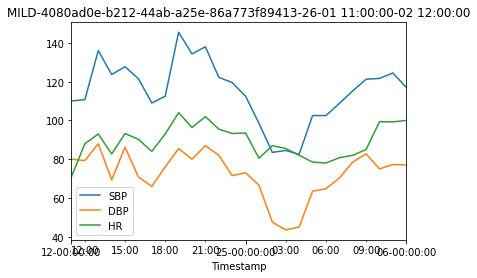

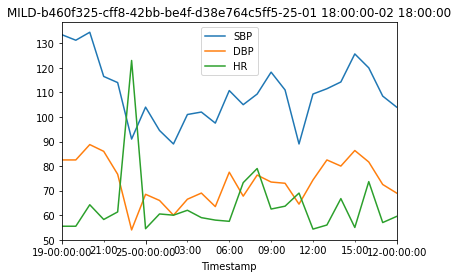

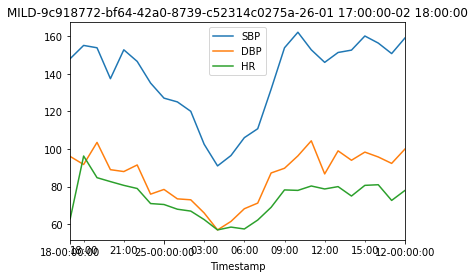

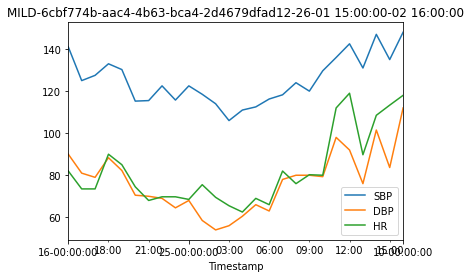

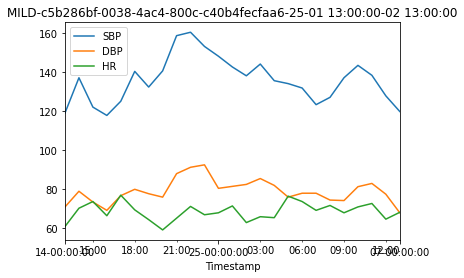

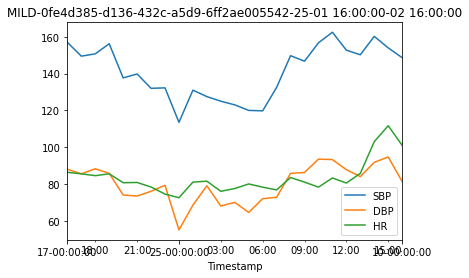

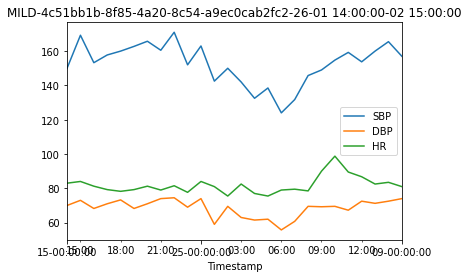

In [33]:
for unid in df_patient_mild["UNID"].unique().tolist():
  df_patient = df_patient_mild[df_patient_mild["UNID"]==unid]
  plot = df_patient[['Timestamp','SBP','DBP','HR']].plot(x='Timestamp', title='MILD-'+unid+'-'+str(len(df_patient))+'-'+df_patient["Timestamp"].min().strftime('%d %H:%M:%S')+'-'+df_patient["Timestamp"].max().strftime('%d %H:%M:%S'), )
  plot.xaxis.set_major_formatter(date_form)
  fig = plot.get_figure()
  fig.savefig('/content/drive/MyDrive/Data Science Projects/OSA Project PhD/Datasets/BP Time series alignment /plot3/MILD-'+unid+".png")
  

In [34]:
minimum = 9999999
min_unid = -1

for unid in df_patient_mild["UNID"].unique().tolist():
   df_patient = df_patient_mild[df_patient_mild["UNID"]==unid]
   diff = df_patient["Timestamp"].max()-df_patient["Timestamp"].min()
   dbp = df_patient["DBP"].var()
   sbp = df_patient["SBP"].var()
   hr = df_patient["HR"].var()
   avg_var = (dbp+sbp+hr)/3
   if avg_var < minimum:
       minimum = avg_var
       min_unid = unid
   print(unid,str(len(df_patient)),dbp,sbp,hr,avg_var)
  
print(unid) 

4080ad0e-b212-44ab-a25e-86a773f89413 26 148.80680555555557 259.9194444444445 72.1694123931624 160.29855413105415
b460f325-cff8-42bb-be4f-d38e764c5ff5 25 78.65108796296295 165.89425925925926 193.25296296296293 145.93277006172838
9c918772-bf64-42a0-8739-c52314c0275a 26 180.44731837606832 458.05837606837594 92.7556517094017 243.753782051282
6cbf774b-aac4-4b63-bca4-2d4679dfad12 26 208.0045405982906 130.29719017094018 303.077094017094 213.79294159544156
c5b286bf-0038-4ac4-800c-c40b4fecfaa6 25 37.062083333333334 136.96083333333334 20.090208333333333 64.704375
0fe4d385-d136-432c-a5d9-6ff2ae005542 25 104.64060370370369 210.43835462962963 82.36306296296297 132.4806737654321
4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2 26 26.540384615384617 143.11 25.28398504273504 64.97812321937323
4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2


In [35]:
minimum = 9999999999
min_unid = -1
for unid in df_patient_mild["UNID"].unique().tolist():
 df_patient = df_patient_mild[df_patient_mild["UNID"]==unid]
 diff = (df_patient["Timestamp"].max()-df_patient["Timestamp"].min()).total_seconds()
 #print(diff)
 dbp = df_patient["DBP"].var()
 sbp = df_patient["SBP"].var()
 hr = df_patient["HR"].var()
 avg_var = (dbp+sbp+hr)/3
 if diff < minimum:
   minimum = diff
   min_unid = unid
print(unid, minimum)

4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2 86400.0


In [36]:
df_patient_moderate = df_new_merge[df_new_merge["OSA_Severity"]=='3']
df_patient_moderate

,UNID,Timestamp,SBP,DBP,HR,OSA_Severity
0,1907f4a6-b068-428d-a88e-38ca9df121f6,2011-01-01 10:00:00,132.500000,76.250000,58.750000,3
1,1907f4a6-b068-428d-a88e-38ca9df121f6,2011-01-01 11:00:00,126.000000,76.250000,76.000000,3
2,1907f4a6-b068-428d-a88e-38ca9df121f6,2011-01-01 12:00:00,112.000000,73.000000,58.750000,3
3,1907f4a6-b068-428d-a88e-38ca9df121f6,2011-01-01 13:00:00,107.000000,65.750000,60.500000,3
4,1907f4a6-b068-428d-a88e-38ca9df121f6,2011-01-01 14:00:00,104.333333,64.666667,65.333333,3
...,...,...,...,...,...,...
6948,c3676c60-a7a1-4cf3-af8f-e4a929bfe0fc,2011-01-02 06:00:00,156.250000,88.250000,77.750000,3
6949,c3676c60-a7a1-4cf3-af8f-e4a929bfe0fc,2011-01-02 07:00:00,154.250000,88.750000,76.250000,3
6950,c3676c60-a7a1-4cf3-af8f-e4a929bfe0fc,2011-01-02 08:00:00,161.750000,93.250000,77.250000,3
6951,c3676c60-a7a1-4cf3-af8f-e4a929bfe0fc,2011-01-02 09:00:00,167.750000,98.500000,75.000000,3


In [37]:
for unid in df_patient_moderate["UNID"].unique().tolist():
  df_patient = df_patient_moderate[df_patient_moderate["UNID"]==unid]
  plot = df_patient[['Timestamp','SBP','DBP','HR']].plot(x='Timestamp', title='MODERATE-'+unid+'-'+str(len(df_patient))+'-'+df_patient["Timestamp"].min().strftime('%d %H:%M:%S')+'-'+df_patient["Timestamp"].max().strftime('%d %H:%M:%S'), )
  plot.xaxis.set_major_formatter(date_form)
  fig = plot.get_figure()
  fig.savefig('/content/drive/MyDrive/Data Science Projects/OSA Project PhD/Datasets/BP Time series alignment /plot3/MODERATE-'+unid+".png")
  

Output hidden; open in https://colab.research.google.com to view.

In [38]:
minimum = 9999999
min_unid = -1
for unid in df_patient_moderate["UNID"].unique().tolist():
  df_patient = df_patient_moderate[df_patient_moderate["UNID"]==unid]
  diff = df_patient["Timestamp"].max()-df_patient["Timestamp"].min()
  dbp = df_patient["DBP"].var()
  sbp = df_patient["SBP"].var()
  hr = df_patient["HR"].var()
  avg_var = (dbp+sbp+hr)/3
  if avg_var < minimum:
    minimum = avg_var
    min_unid = unid
  print(unid,str(len(df_patient)),dbp,sbp,hr,avg_var)

print(unid)

1907f4a6-b068-428d-a88e-38ca9df121f6 25 94.71951388888887 218.67909722222225 30.02229166666666 114.47363425925926
10f28441-712e-4ba8-ae0b-32cbcec37922 25 163.12770833333335 340.66682870370374 64.3800462962963 189.3915277777778
11ec5e49-f199-4e48-b2a7-db3058167e07 25 106.53039351851852 220.20111111111103 14.498541666666663 113.74334876543207
bbf71419-6478-40a9-879f-7478eb51a921 26 126.60026709401711 192.66509615384618 84.30961538461541 134.5249928774929
c507666d-bbfa-4f2a-bea7-ec4e313ce6df 26 158.097905982906 335.18193376068376 29.19764957264957 174.1591631054131
8d339295-5d80-49ee-a6fb-d8ef07e23c14 25 80.29148148148151 155.8134953703704 51.25041666666667 95.78513117283954
d0a1e0e4-fb19-4c5c-897e-97bdb387c8ae 25 252.11812499999996 352.3645833333333 106.26625 236.9163194444444
d670c7e7-fdda-4dbe-848b-7ff64fb8d81d 25 63.62923611111111 54.38407407407407 32.581064814814816 50.198125000000005
7655469c-f7e3-4208-8143-63b0b7c80b1c 25 34.278981481481495 67.06046296296296 10.457754629629628 37.2

In [39]:
minimum = 9999999999
min_unid = -1
for unid in df_patient_moderate["UNID"].unique().tolist():
 df_patient = df_patient_moderate[df_patient_moderate["UNID"]==unid]
 diff = (df_patient["Timestamp"].max()-df_patient["Timestamp"].min()).total_seconds()
 #print(diff)
 dbp = df_patient["DBP"].var()
 sbp = df_patient["SBP"].var()
 hr = df_patient["HR"].var()
 avg_var = (dbp+sbp+hr)/3
 if diff < minimum:
   minimum = diff
   min_unid = unid
print(unid, minimum)

c3676c60-a7a1-4cf3-af8f-e4a929bfe0fc 79200.0


In [40]:
df_patient_severe = df_new_merge[df_new_merge["OSA_Severity"]=='4']
df_patient_severe

,UNID,Timestamp,SBP,DBP,HR,OSA_Severity
25,c27adf3f-9de5-4cb8-9861-6840c75e9f9b,2011-01-01 09:00:00,134.00,91.00,64.50,4
26,c27adf3f-9de5-4cb8-9861-6840c75e9f9b,2011-01-01 10:00:00,128.50,87.25,59.00,4
27,c27adf3f-9de5-4cb8-9861-6840c75e9f9b,2011-01-01 11:00:00,145.00,94.75,76.00,4
28,c27adf3f-9de5-4cb8-9861-6840c75e9f9b,2011-01-01 12:00:00,130.50,91.25,76.75,4
29,c27adf3f-9de5-4cb8-9861-6840c75e9f9b,2011-01-01 13:00:00,113.50,86.50,80.75,4
...,...,...,...,...,...,...
7100,4df07e13-4a0b-4da8-a960-66d18dba96eb,2011-01-02 11:00:00,197.75,110.00,77.00,4
7101,4df07e13-4a0b-4da8-a960-66d18dba96eb,2011-01-02 12:00:00,179.25,110.25,95.75,4
7102,4df07e13-4a0b-4da8-a960-66d18dba96eb,2011-01-02 13:00:00,193.50,109.25,79.75,4
7103,4df07e13-4a0b-4da8-a960-66d18dba96eb,2011-01-02 14:00:00,182.25,115.25,81.75,4


In [41]:
for unid in df_patient_severe["UNID"].unique().tolist():
  df_patient = df_patient_severe[df_patient_severe["UNID"]==unid]
  plot = df_patient[['Timestamp','SBP','DBP','HR']].plot(x='Timestamp', title='SEVERE-'+unid+'-'+str(len(df_patient))+'-'+df_patient["Timestamp"].min().strftime('%d %H:%M:%S')+'-'+df_patient["Timestamp"].max().strftime('%d %H:%M:%S'), )
  plot.xaxis.set_major_formatter(date_form)
  fig = plot.get_figure()
  fig.savefig('/content/drive/MyDrive/Data Science Projects/OSA Project PhD/Datasets/BP Time series alignment /plot3/SEVERE-'+unid+".png")

Output hidden; open in https://colab.research.google.com to view.

In [42]:
minimum = 9999999
min_unid = -1
for unid in df_patient_severe["UNID"].unique().tolist():
  df_patient = df_patient_severe[df_patient_severe["UNID"]==unid]
  diff = df_patient["Timestamp"].max()-df_patient["Timestamp"].min()
  dbp = df_patient["DBP"].var()
  sbp = df_patient["SBP"].var()
  hr = df_patient["HR"].var()
  avg_var = (dbp+sbp+hr)/3
  if avg_var < minimum:
    minimum = avg_var
    min_unid = unid
  print(unid,str(len(df_patient)),dbp,sbp,hr,avg_var)
  
print(unid)


c27adf3f-9de5-4cb8-9861-6840c75e9f9b 25 116.60480833333332 253.61249259259253 226.30685185185192 198.84138425925926
303a3352-8d4c-451a-87d0-c9c17bb9f45a 26 80.95615384615384 84.94884615384615 97.63461538461537 87.84653846153844
5a8261e8-a835-4f29-ae7f-cc85d9eeacb7 26 66.99773504273503 54.170865384615375 20.496121794871797 47.22157407407408
83616881-54a1-47c6-882d-328e44f119ae 26 31.80987179487178 36.39901709401709 222.8409401709402 97.01660968660968
04139fd7-2682-476d-9e0a-7bc5207139b7 25 56.65104166666665 202.29171296296295 33.06118055555556 97.33464506172838
2bc367c7-fcac-4a26-8e1c-8e6472c5b151 26 165.02723931623933 220.09207905982905 120.0207371794872 168.3800185185185
85404467-bca9-4208-8f0a-03a1fcaaf5bd 24 97.42451690821255 209.45077244363932 142.68855676328502 149.8546153717123
b004c500-cf29-4c29-8f27-65dac2c1f6ae 26 37.59884615384615 111.4305982905983 35.12337606837607 61.3842735042735
10501661-25f2-4496-86fc-c1073d16ce0d 26 60.215096153846154 93.88346153846155 20.09538461538462

In [43]:
minimum = 9999999999
min_unid = -1
for unid in df_patient_severe["UNID"].unique().tolist():
 df_patient = df_patient_severe[df_patient_severe["UNID"]==unid]
 diff = (df_patient["Timestamp"].max()-df_patient["Timestamp"].min()).total_seconds()
 #print(diff)
 dbp = df_patient["DBP"].var()
 sbp = df_patient["SBP"].var()
 hr = df_patient["HR"].var()
 avg_var = (dbp+sbp+hr)/3
 if diff < minimum:
   minimum = diff
   min_unid = unid
print(unid, minimum)

4df07e13-4a0b-4da8-a960-66d18dba96eb 79200.0


In [44]:
baseline = final_df[final_df['UNID']== '4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2']
baseline

,UNID,Timestamp,SBP,DBP,HR
0,4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2,2011-01-01 14:00:00,150.00,70.00,83.000000
1,4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2,2011-01-01 15:00:00,169.25,73.00,84.000000
2,4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2,2011-01-01 16:00:00,153.25,68.25,81.250000
3,4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2,2011-01-01 17:00:00,157.75,71.00,79.250000
4,4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2,2011-01-01 18:00:00,160.00,73.25,78.250000
5,4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2,2011-01-01 19:00:00,162.75,68.25,79.250000
6,4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2,2011-01-01 20:00:00,165.75,71.00,81.250000
7,4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2,2011-01-01 21:00:00,160.50,74.00,79.000000
8,4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2,2011-01-01 22:00:00,171.00,74.50,81.500000
9,4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2,2011-01-01 23:00:00,152.00,69.00,77.666667


In [45]:
baseline_sbp = baseline["SBP"].tolist()
baseline_dbp = baseline["DBP"].tolist()
baseline_hr = baseline["HR"].tolist()

baseline_list = []
for i in range(len(baseline_sbp)):
  baseline_list.append([baseline_sbp[i], baseline_dbp[i], baseline_hr[i]])

In [46]:
print(type(baseline_dbp))

<class 'list'>


In [47]:
UNID = final_df['UNID'].unique()
len(UNID)

282

In [48]:
from pandas.core.arrays import base
for unid in UNID:
  if unid != '4c51bb1b-8f85-4a20-8c54-a9ec0cab2fc2':
    patient = final_df[final_df['UNID']== unid]
    patient_sbp = patient["SBP"].tolist()
    patient_dbp = patient["DBP"].tolist()
    patient_hr = patient["HR"].tolist()
   
    patient_list = []
    for i in range(len(patient_sbp)):
      patient_list.append([patient_sbp[i], patient_dbp[i], patient_hr[i]])